## Overview

Adaptive sparse grids constructed at Chebyshev nodes provide an efficient way to approximate functions of multiple variables. This nodebooks gives examples of how to build approximations for functions of two and three variables.

For details of the algorithm see Algorithm 5 of https://arxiv.org/abs/2307.08997 and the papers it is based off of

 * Bathelmann Volker, Novak Erich, Ritter Klaus. High dimensional polynomial interpolation
    on sparse grids // Advances in Computation Mathematics. 2000. 273-288
 * Gerstner Thomas, Griebel Michael. Dimension–Adaptive Tensor–Product Quadrature // Computing. 
    09 2003. 71. 65–87
 * Klimke Andreas. Uncertainty Modeling using Fuzzy Arithmetic and Sparse Grids. 01 2006. 40–41.
 * Jakeman John D., Roberts Stephen G. Local and Dimension Adaptive Sparse Grid Interpolation and 
    Quadrature. 2011

In [1]:
import numpy as np
from bbai.numeric import SparseGridInterpolator
import matplotlib.pyplot as plt
from scipy.interpolate import RegularGridInterpolator
np.random.seed(0)

## Example 1: fit a function of 2 variables

In [2]:
def f(x, y):
    v1 = np.abs(x - 0.2)
    v2 = 2 * np.abs(y - 0.7)
    return np.exp(-v1 - v2)

In [3]:
interp = SparseGridInterpolator()
interp.fit(f)

num points = 1794


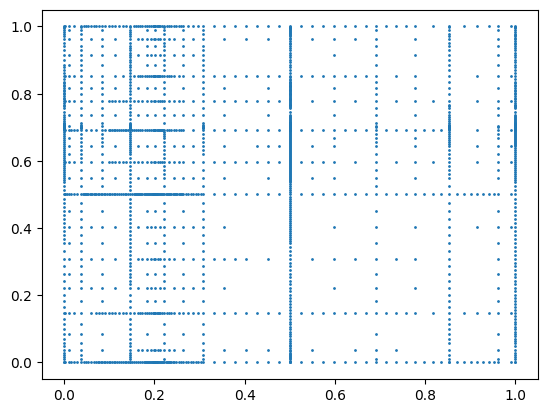

In [4]:
pts = interp.points
print('num points =', pts.shape[1])
plt.scatter(pts[0, :], pts[1, :], s=1)

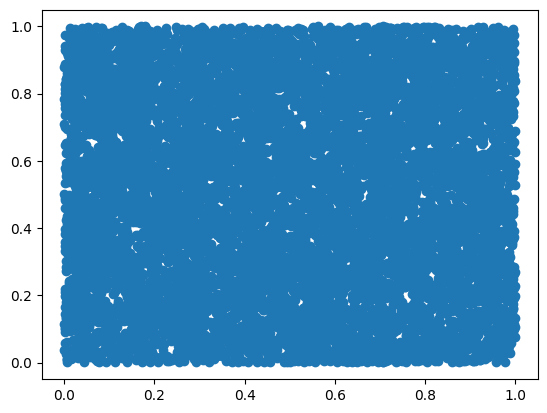

In [5]:
# Test the accuracy of the approximation at randomly distributed points
N = 10000
X = np.random.uniform(size=(N, 2))
plt.scatter(X[:,0], X[:, 1])

In [6]:
f_true = f(X[:,0], X[:, 1])
f_approx = interp.evaluate(X[:,0], X[:,1])
errs = np.abs(f_true - f_approx)
print('sparse grid mean/max error: ', np.mean(errs), np.max(errs))

sparse grid mean/max error:  6.104854255983044e-05 0.0009562678203793862


In [7]:
# For comparison also approximate using cubic splines on a dense grid
cnt = int(np.ceil(pts.shape[1]**.5))
xx = np.linspace(0, 1, cnt)
yy = np.linspace(0, 1, cnt)
xg, yg = np.meshgrid(xx, yy, indexing='ij')
evals = f(xg, yg)
interp2 = RegularGridInterpolator((xx, yy), evals, method='cubic')
f_approx2 = interp2(np.array([X[:, 0], X[:, 1]]).T)
errs2 = np.abs(f_true - f_approx2)
print('dense grid mean/max error:', np.mean(errs2), np.max(errs2))

dense grid mean/max error: 0.00024614520681563674 0.01664113683843249


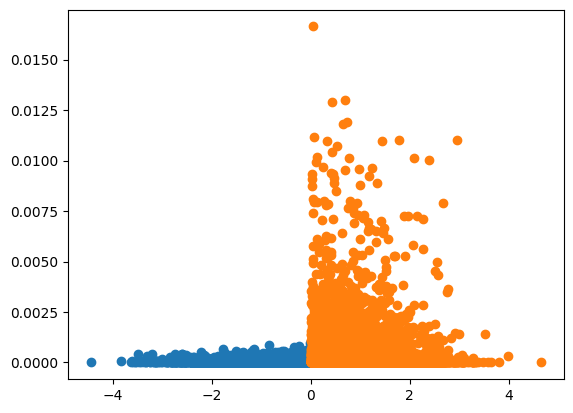

In [8]:
plt.scatter(-np.abs(np.random.normal(size=N)), errs)
plt.scatter(np.abs(np.random.normal(size=N)), errs2)

## Example 2: fit a function of 3 variables

In [9]:
def f(x, y, z):
    t1 = 0.68 * np.abs(x - 0.3)
    t2 = 1.25 * np.abs(y - 0.15)
    t3 = 1.86 * np.abs(z - 0.09)
    return np.exp(-t1 - t2 - t3)

In [10]:
interp = SparseGridInterpolator()
interp.fit(f)

num points = 6498


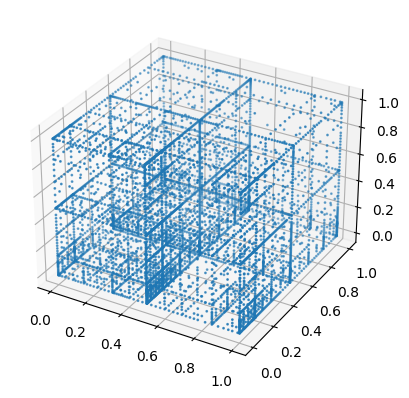

In [11]:
pts = interp.points
print('num points =', pts.shape[1])
ax = plt.axes(projection='3d')
ax.scatter3D(pts[0, :], pts[1, :], pts[2,:], s=1)

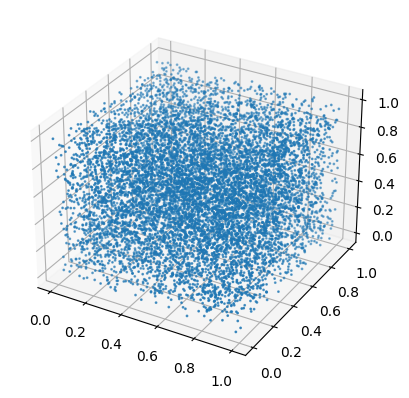

In [12]:
# Test the accuracy of the approximation at randomly distributed points
N = 10000
X = np.random.uniform(size=(N, 3))
ax = plt.axes(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], X[:,2], s=1)

In [13]:
f_true = f(X[:,0], X[:, 1], X[:, 2])
f_approx = interp.evaluate(X[:,0], X[:,1], X[:,2])
errs = np.abs(f_true - f_approx)
print('sparse grid mean/max error:', np.mean(errs), np.max(errs))

sparse grid mean/max error: 5.230221513718906e-05 0.0023231579552488446


In [14]:
# For comparison also approximate using cubic splines on a dense grid
cnt = int(np.ceil(pts.shape[1]**(1.0 / 3.0)))
xx = np.linspace(0, 1, cnt)
yy = np.linspace(0, 1, cnt)
zz = np.linspace(0, 1, cnt)
xg, yg, zg = np.meshgrid(xx, yy, zz, indexing='ij')
evals = f(xg, yg, zg)
interp2 = RegularGridInterpolator((xx, yy, zz), evals, method='cubic')
f_approx2 = interp2(np.array([X[:, 0], X[:, 1], X[:,2]]).T)
errs2 = np.abs(f_true - f_approx2)
print('dense grid mean/max error:', np.mean(errs2), np.max(errs2))

dense grid mean/max error: 0.001110514090619885 0.032956869366707386


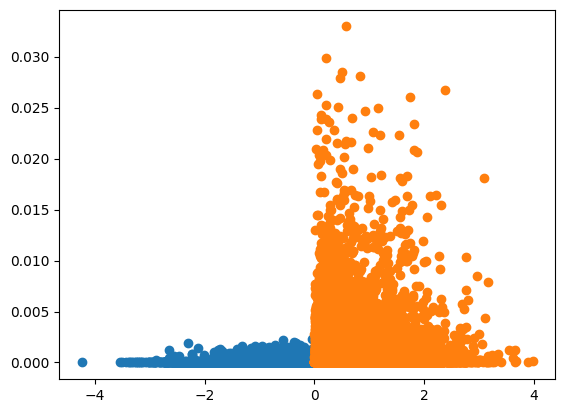

In [15]:
plt.scatter(-np.abs(np.random.normal(size=N)), errs)
plt.scatter(np.abs(np.random.normal(size=N)), errs2)